In [1]:
import sklearn

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

In [5]:
iris = datasets.load_iris()

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.data.shape

(150, 4)

In [13]:
iris.items()

dict_items([('data', array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4,

In [15]:
from collections import Counter
target = Counter(iris.target)

In [16]:
target

Counter({0: 50, 1: 50, 2: 50})

In [31]:
len(iris.data)

150

In [18]:
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [84]:
X = iris.data[:,2:]
y = iris.target

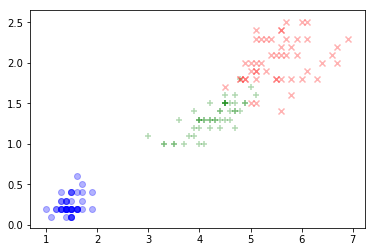

In [85]:
plt.scatter(X[y==0,0],X[y==0,1],alpha=0.3,color='blue',marker='o')
plt.scatter(X[y==1,0],X[y==1,1],alpha=0.3,color='green',marker='+')
plt.scatter(X[y==2,0],X[y==2,1],alpha=0.3,color='red',marker='x')
plt.show()

In [86]:
def split(X,y,d,value):
    index_l = (X[:,d]<=value)
    index_r = (X[:,d]>value)
    return X[index_l],X[index_r],y[index_l],y[index_r]

In [104]:

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res

def try_split(X,y):
    best_d,best_v = -1,-1
    best_entropy = float('inf')
    for d in range(X.shape[1]):
        sort_index = np.argsort(X[:,d])
        for i in range(1,len(X)):
            if X[sort_index[i],d] != X[sort_index[i-1],d]:
                v = (X[sort_index[i],d]+X[sort_index[i-1],d])/2
                X_l,X_r,y_l,y_r = split(X,y,d,v)
                e = entropy(y_l) + entropy(y_r)
                if e < best_entropy:
                    best_entropy,best_d,best_v = e,d,v
    return best_entropy,best_d,best_v
            
        
    

In [105]:
best_entropy,best_d,best_v = try_split(iris.data[:,2:],iris.target)

In [106]:
best_entropy,best_d,best_v

(0.6931471805599453, 0, 2.45)

In [107]:
X1_l,X1_r,y1_l,y1_r = split(X,y,best_d,best_v)

In [111]:
best_entropy,best_d,best_v = try_split(X1_r,y1_r)

In [112]:
best_entropy,best_d,best_v

(0.4132278899361904, 1, 1.75)

In [113]:
entropy(y1_l)

0.0